In [7]:
%reset -f

In [8]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import time
import kl_ucb_policy
import ts_bandit_policy

In [11]:
#Parameters for TS test
# p = np.array([.99, .98, .96, .93, 0.90, .10, .06, .04]) #Bernoulli Parameters
p = np.array([.95, .90, .80, .65, .45, .25, .15, .10])
# p = np.array([.90, .80, .70, .55, .45, .35, .20, .10])
rate = np.array([6, 9, 12, 18, 24, 36, 48, 54])
tp = np.multiply(p,rate)

K= p.shape[0] #Number of branches
Delta= ( np.ones(K)*np.max(tp) ) - tp
s = ts_bandit_policy.construct_s(rate, K)


T= 6000 #Time periods
runs = 5 #Number of iterations

print("Pi:",p)
print("Delta:",Delta)

Pi: [0.95 0.9  0.8  0.65 0.45 0.25 0.15 0.1 ]
Delta: [6.  3.6 2.1 0.  0.9 2.7 4.5 6.3]


In [12]:
Phi = s[0][:,3]*(1-p[3])+s[1][:,3]*p[3]

In [41]:
# %%capture
c_ts = ts_bandit_policy.CBanditPolicy(K, rate, s, 0)
total_rewards_list_c_ts = np.zeros((runs, T))
actions_list_c_ts = []

ts = ts_bandit_policy.TSBanditPolicy(K, rate, 0)
total_rewards_list_ts = np.zeros((runs, T))
actions_list_ts = []

cklucb = kl_ucb_policy.C_KLUCB(K, rate, s) #Original KL UCB
total_rewards_list_cklucb = np.zeros((runs, T))
actions_list_cklucb = []

klucb = kl_ucb_policy.KLUCBPolicy(K, rate) #Original KL UCB
total_rewards_list_klucb = np.zeros((runs, T))
actions_list_klucb = []

start_time = time.time()

for run in range(runs):
    c_ts.reset()
    actions_c_ts = np.zeros((K, T), dtype=int)
    rewards_c_ts = np.zeros((K, T), dtype=float)

    ts.reset()
    actions_ts = np.zeros((K, T), dtype=int)
    rewards_ts = np.zeros((K, T), dtype=float)

    cklucb.reset()
    actions_cklucb = np.zeros((K, T), dtype=int)
    rewards_cklucb = np.zeros((K, T), dtype=float)

    klucb.reset()
    actions_klucb = np.zeros((K, T), dtype=int)
    rewards_klucb = np.zeros((K, T), dtype=float)

    for t in range(T):
        c_ts.reduce_set()
        arm_c_ts = c_ts.select_next_arm()
        actions_c_ts[arm_c_ts, t] = 1
        rewards_c_ts[arm_c_ts, t] = np.random.binomial(1, p[arm_c_ts]) * rate[arm_c_ts]
        c_ts.update_state(arm_c_ts, int(rewards_c_ts[arm_c_ts, t] / rate[arm_c_ts]))

        arm_ts = ts.select_next_arm()
        actions_ts[arm_ts, t] = 1
        rewards_ts[arm_ts, t] = np.random.binomial(1, p[arm_ts]) * rate[arm_ts]
        ts.update_state(arm_ts, int(rewards_ts[arm_ts, t] / rate[arm_ts]))

        cklucb.reduce_set()
        arm_cklucb = cklucb.select_next_arm()
        actions_cklucb[arm_cklucb, t] = 1
        rewards_cklucb[arm_cklucb, t] = np.random.binomial(1, p[arm_cklucb]) * rate[arm_cklucb]
        cklucb.update_state(arm_cklucb, int(rewards_cklucb[arm_cklucb, t] / rate[arm_cklucb]))

        arm_klucb = klucb.select_next_arm()
        actions_klucb[arm_klucb, t] = 1
        rewards_klucb[arm_klucb, t] = np.random.binomial(1, p[arm_klucb]) * rate[arm_klucb]
        klucb.update_state(arm_klucb, rewards_klucb[arm_klucb, t] / rate[arm_klucb])

    cumulative_rewards_c_ts = np.cumsum(rewards_c_ts, axis=1) #Cumulative rewards of each arm according to time
    total_rewards_c_ts = np.sum(cumulative_rewards_c_ts, axis=0) #Cumulative rewards of all arms according to time
    total_rewards_list_c_ts[run, :] = np.copy(total_rewards_c_ts)
    actions_list_c_ts.append(np.copy(actions_c_ts))

    cumulative_rewards_ts = np.cumsum(rewards_ts, axis=1) #Cumulative rewards of each arm according to time
    total_rewards_ts = np.sum(cumulative_rewards_ts, axis=0) #Cumulative rewards of all arms according to time
    total_rewards_list_ts[run, :] = np.copy(total_rewards_ts)
    actions_list_ts.append(np.copy(actions_ts))

    cumulative_rewards_cklucb = np.cumsum(rewards_cklucb, axis=1) #Cumulative rewards of each arm according to time
    total_rewards_cklucb = np.sum(cumulative_rewards_cklucb, axis=0) #Cumulative rewards of all arms according to time
    total_rewards_list_cklucb[run, :] = np.copy(total_rewards_cklucb)
    actions_list_cklucb.append(np.copy(actions_cklucb))

    cumulative_rewards_klucb = np.cumsum(rewards_klucb, axis=1) #Cumulative rewards of each arm according to time
    total_rewards_klucb = np.sum(cumulative_rewards_klucb, axis=0) #Cumulative rewards of all arms according to time
    total_rewards_list_klucb[run, :] = np.copy(total_rewards_klucb)
    actions_list_klucb.append(np.copy(actions_klucb))

time_spent = time.time() - start_time

D:\Academic\RateControl\Bandit_UCB\kl_ucb_policy.py:167: RuntimeWarning: invalid value encountered in true_divide
  r_emp = (self.S / self.N) * self.rate * self.Sig_S
D:\Academic\RateControl\Bandit_UCB\kl_ucb_policy.py:64: RuntimeWarning: divide by zero encountered in log
  upperbound = np.log(t) / N[k]
D:\Academic\RateControl\Bandit_UCB\kl_ucb_policy.py:65: RuntimeWarning: invalid value encountered in double_scalars
  reward = S[k] / N[k]
D:\Academic\RateControl\Bandit_UCB\kl_ucb_policy.py:200: RuntimeWarning: invalid value encountered in double_scalars
  self.Phi[k, k] = self.S[k] / self.N[k] * self.rate[k]
D:\Academic\RateControl\Bandit_UCB\kl_ucb_policy.py:64: RuntimeWarning: invalid value encountered in double_scalars
  upperbound = np.log(t) / N[k]
D:\Academic\RateControl\Bandit_UCB\kl_ucb_policy.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  upperbound = np.log(t) / N[k]
D:\Academic\RateControl\Bandit_UCB\kl_ucb_policy.py:9: RuntimeWarning: divide by zero 

## Simulation Result

In [42]:
# print("Time for Thompson Sampling, with T =", T, ", runs =", runs, ":", (time_spent), "seconds")
#
# ## Average total rewards
# mean_total_rewards_c_ts = np.mean(total_rewards_list_c_ts, axis=0)
# mean_total_rewards_ts = np.mean(total_rewards_list_ts, axis=0)
# mean_total_rewards_klucb = np.mean(total_rewards_list_klucb, axis=0)
# print("t & Reward (total) c_ts :", t, mean_total_rewards_c_ts[t])
# print("t & Reward (total) ts :", t, mean_total_rewards_ts[t])
# print("t & Reward (total) KL-UCB :", t, mean_total_rewards_klucb[t])
#
# fig = plt.figure(figsize=(12, 8))
# ax1 = fig.add_subplot(1, 1, 1)
# ax1.plot(mean_total_rewards_c_ts, linestyle='-', label='Average total rewards of C-TS')
# ax1.plot(mean_total_rewards_ts, linestyle='-', label='Average total rewards of TS')
# ax1.plot(mean_total_rewards_klucb, linestyle='-', label='Average total rewards of KL-UCB')
# ax1.legend(loc='best')
# ax1.set_title('Evolution of cumulative rewards according to time')
# plt.show()

In [43]:
#Regrets calculation for TS
total_action_c_ts = np.zeros((K, T))
for actions_c_ts in actions_list_c_ts:
    total_action_c_ts += np.cumsum(actions_c_ts, axis=1)  #The cumulative times of each arm to be selected
total_action_c_ts = total_action_c_ts / runs
regret_cumule_c_ts = np.dot(Delta, total_action_c_ts[:, :])  # Cumulative regrets

total_action_ts = np.zeros((K,T))
for actions_ts in actions_list_ts:
    total_action_ts += np.cumsum(actions_ts, axis=1)  #The cumulative times of each arm to be selected
total_action_ts = total_action_ts / runs
regret_cumule_ts = np.dot(Delta, total_action_ts[:, :])  # Cumulative regrets

total_action_cklucb = np.zeros((K, T))
for actions_cklucb in actions_list_cklucb:
    total_action_cklucb += np.cumsum(actions_cklucb, axis=1) #The cumulative times of each arm to be selected
total_action_cklucb = total_action_cklucb / runs
regret_cumule_cklucb = np.dot(Delta, total_action_cklucb[:, :]) # Cumulative regrec_ts

total_action_klucb = np.zeros((K, T))
for actions_klucb in actions_list_klucb:
    total_action_klucb += np.cumsum(actions_klucb, axis=1) #The cumulative times of each arm to be selected
total_action_klucb = total_action_klucb / runs
regret_cumule_klucb = np.dot(Delta, total_action_klucb[:, :]) # Cumulative regrec_ts


Text(0, 0.5, 'Regret')

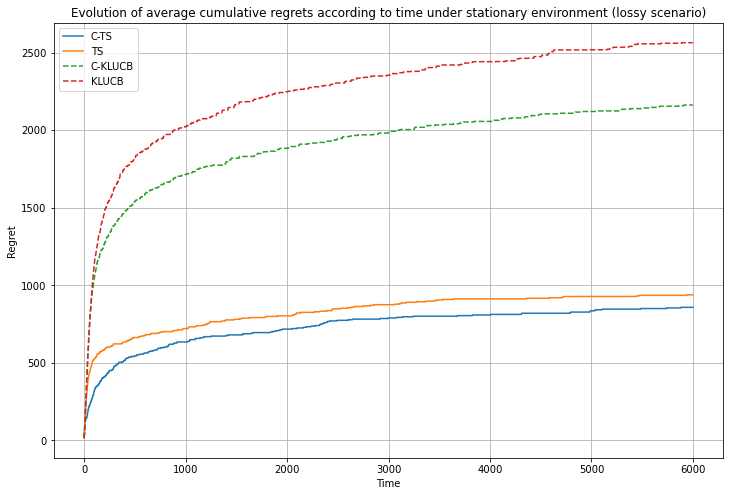

In [44]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(regret_cumule_c_ts[:], linestyle='-', label='C-TS')
ax1.plot(regret_cumule_ts[:], linestyle='-', label='TS')
ax1.plot(regret_cumule_cklucb[:],linestyle='--', label='C-KLUCB')
ax1.plot(regret_cumule_klucb[:],linestyle='--', label='KLUCB')

ax1.legend(loc='best')
ax1.grid()
ax1.set_title('Evolution of average cumulative regrets according to time under stationary environment (lossy scenario)')
plt.xlabel('Time')
plt.ylabel('Regret')

# plt.show()

In [46]:
np.save('regret_c_ts',regret_cumule_c_ts)
np.save('regret_ts',regret_cumule_ts)
np.save('regret_cklucb',regret_cumule_cklucb)
np.save('regret_klucb',regret_cumule_klucb)